In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### marked cf result

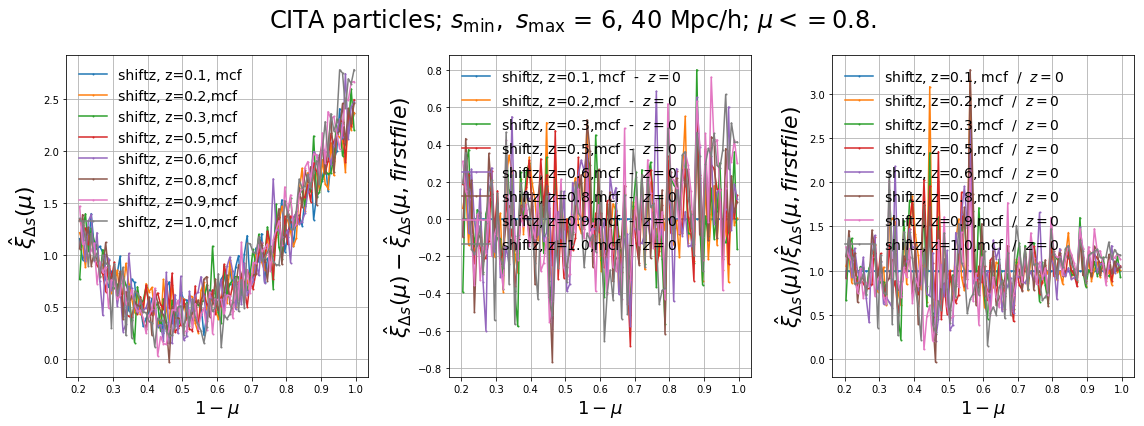

In [27]:
for s_min, s_max, mumax in [[6,40,0.8]   ]:
    numsbin=150; nummubin=120;

    fig, axs = plt.subplots(1,3, figsize=(16,6))
    ax1, ax2, ax3 = axs
    Ys = []
    #for snapid in [15-0, 15-3, 15-5, 15-7, 15-10, 15-12, 15-15]:    
    for filename, label in [
    #['../CITAData/subsamples/gadget_000.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.s0to.mu.zplus1000000000.2pcf',
    #   'shiftz, cf'],
        #['../CITAData/subsamples/gadget_015.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-1.150s0to150.120mu.zplus1000000000.2pcf',
       #'shiftz, z=0, mcf'],
        ['../CITAData/subsamples/gadget_014.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-1.150s0to150.120mu.zplus1000000000.2pcf',
       'shiftz, z=0.1, mcf'],
        ['../CITAData/subsamples/gadget_013.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-1.150s0to150.120mu.zplus1000000000.2pcf',
       'shiftz, z=0.2,mcf'],
        ['../CITAData/subsamples/gadget_012.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-1.150s0to150.120mu.zplus1000000000.2pcf',
       'shiftz, z=0.3,mcf'],
       # ['../CITAData/subsamples/gadget_011.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-1.150s0to150.120mu.zplus1000000000.2pcf',
       #'shiftz, z=0.4,mcf'],
        ['../CITAData/subsamples/gadget_010.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-1.150s0to150.120mu.zplus1000000000.2pcf',
       'shiftz, z=0.5,mcf'],
        ['../CITAData/subsamples/gadget_009.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-1.150s0to150.120mu.zplus1000000000.2pcf',
       'shiftz, z=0.6,mcf'],
        #['../CITAData/subsamples/gadget_008.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-1.150s0to150.120mu.zplus1000000000.2pcf',
       #'shiftz, z=0.7,mcf'],
        ['../CITAData/subsamples/gadget_007.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-1.150s0to150.120mu.zplus1000000000.2pcf',
       'shiftz, z=0.8,mcf'],
        ['../CITAData/subsamples/gadget_006.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-1.150s0to150.120mu.zplus1000000000.2pcf',
       'shiftz, z=0.9,mcf'],
        ['../CITAData/subsamples/gadget_005.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-1.150s0to150.120mu.zplus1000000000.2pcf',
       'shiftz, z=1.0,mcf'],
        #['../CITAData/subsamples/gadget_004.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-1.150s0to150.120mu.zplus1000000000.2pcf',
       #'shiftz, z=1.1,mcf'],
    #['../CITAData/subsamples/gadget_000.rat0.0027_ranseed0.shiftr.om0.2951_w-1.0000.radeczw.150s0to150.120mu.2pcf',
    #   'shiftr, cf'],
        ]:
        # filename, label
        ## load in
        data = np.loadtxt(filename); norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
        ## DD, DR and RR
        DD, DR, RR = [data[:,row].reshape(150,120) for row in [3,4,6]]; 
        DD /= norms[0]; DR /= norms[1]; RR /= norms[2]
        # xi, intximu
        xi = np.divide(DD-2*DR+RR,RR)
        intximu = xi[s_min:s_max+1,:].sum(0)
        # X, Y for plot
        imumax = int(nummubin*mumax)
        #intximu = intximu[:imumax]
        mu = data[:,0]; X = np.ones(nummubin) - mu[:nummubin]; 
        X = X[:imumax]; Y = intximu[:imumax]/intximu[:imumax].sum()*len(intximu[:imumax]); 
        #print filename, Y
        Ys.append([xx for xx in Y])
        # make plot
        ax1.plot(X,Y, marker='o', markersize=1, label=label )
        ax2.plot(X, (Y - np.array(Ys[0])), 
                 marker='o', markersize=1, label=label+ r'  -  $z = 0$' )
        ax3.plot(X, np.divide(Y,  np.array(Ys[0])), 
                 marker='o', markersize=1, label=label+ r'  /  $z = 0$' )
    # axes settings    
    for ax in [ax1, ax2, ax3]:
        ax.grid(); ax.set_xlabel('$1-\mu$', fontsize=18)    
        ax.legend(fontsize=14, frameon=False)
    ax1.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$', fontsize=22)
    ax2.set_ylabel(r'$\hat \xi_{\Delta s}(\mu) - \hat \xi_{\Delta s}(\mu, first file)$', fontsize=22)
    ax3.set_ylabel(r'$\hat \xi_{\Delta s}(\mu) / \hat \xi_{\Delta s}(\mu, first file)$', fontsize=22)
    # fig settings
    fig.suptitle('CITA particles; $s_{\\rm min},\\ s_{\\rm max}$ = '+str(s_min)+', '+str(s_max)+\
     ' Mpc/h; $\mu <= '+str(mumax)+'$.', fontsize=24,); fig.tight_layout(rect=(0, 0, 1, 0.9)); plt.show()

/usr/share/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in divide


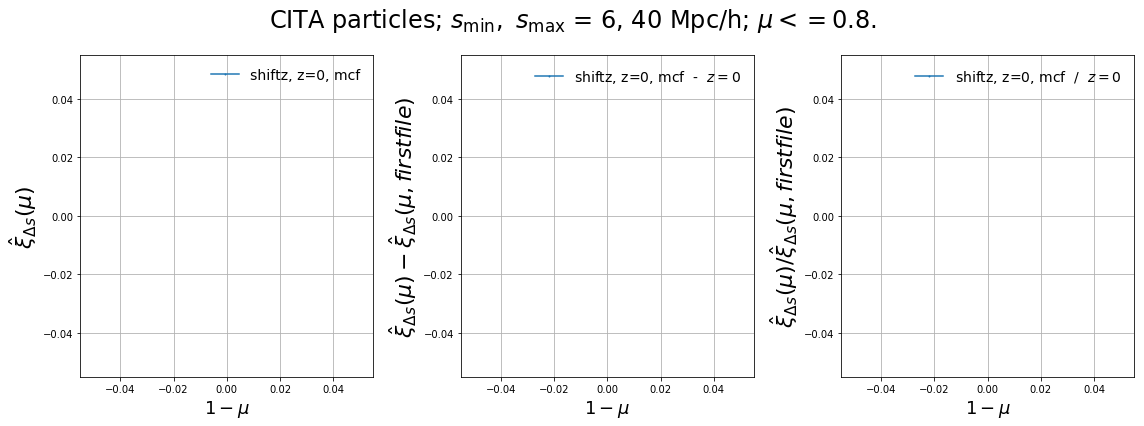

In [28]:
for s_min, s_max, mumax in [[6,40,0.8]   ]:
    numsbin=150; nummubin=120;

    fig, axs = plt.subplots(1,3, figsize=(16,6))
    ax1, ax2, ax3 = axs
    Ys = []
    #for snapid in [15-0, 15-3, 15-5, 15-7, 15-10, 15-12, 15-15]:    
    for filename, label in [
        ['../CITAData/subsamples/gadget_015.rat0.0027_ranseed0.shiftz.om0.2951_w-1.0000.radeczw.rho-1.150s0to150.120mu.zplus1000000000.2pcf',
       'shiftz, z=0, mcf'],
        ]:
        # filename, label
        ## load in
        data = np.loadtxt(filename); norms = [float(xx) for xx in open(filename, 'r').readline().split()[1:4]]
        ## DD, DR and RR
        DD, DR, RR = [data[:,row].reshape(150,120) for row in [3,4,6]]; 
        DD /= norms[0]; DR /= norms[1]; RR /= norms[2]
        # xi, intximu
        xi = np.divide(DD-2*DR+RR,RR)
        intximu = xi[s_min:s_max+1,:].sum(0)
        # X, Y for plot
        imumax = int(nummubin*mumax)
        #intximu = intximu[:imumax]
        mu = data[:,0]; X = np.ones(nummubin) - mu[:nummubin]; 
        X = X[:imumax]; Y = intximu[:imumax]/intximu[:imumax].sum()*len(intximu[:imumax]); 
        #print filename, Y
        Ys.append([xx for xx in Y])
        # make plot
        ax1.plot(X,Y, marker='o', markersize=1, label=label )
        ax2.plot(X, (Y - np.array(Ys[0])), 
                 marker='o', markersize=1, label=label+ r'  -  $z = 0$' )
        ax3.plot(X, np.divide(Y,  np.array(Ys[0])), 
                 marker='o', markersize=1, label=label+ r'  /  $z = 0$' )
    # axes settings    
    for ax in [ax1, ax2, ax3]:
        ax.grid(); ax.set_xlabel('$1-\mu$', fontsize=18)    
        ax.legend(fontsize=14, frameon=False)
    ax1.set_ylabel(r'$\hat \xi_{\Delta s}(\mu)$', fontsize=22)
    ax2.set_ylabel(r'$\hat \xi_{\Delta s}(\mu) - \hat \xi_{\Delta s}(\mu, first file)$', fontsize=22)
    ax3.set_ylabel(r'$\hat \xi_{\Delta s}(\mu) / \hat \xi_{\Delta s}(\mu, first file)$', fontsize=22)
    # fig settings
    fig.suptitle('CITA particles; $s_{\\rm min},\\ s_{\\rm max}$ = '+str(s_min)+', '+str(s_max)+\
     ' Mpc/h; $\mu <= '+str(mumax)+'$.', fontsize=24,); fig.tight_layout(rect=(0, 0, 1, 0.9)); plt.show()